In [1]:
tasmia = "In the name of Allah, the Most Benoficient, the Most Merciful"
tasmia

'In the name of Allah, the Most Benoficient, the Most Merciful'

### Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import statsmodels.api as sm
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

### Import Dataset

In [3]:
d = pd.read_csv("ch1_discoveries.csv")
d.head()

,date,Y
0,01-01-1860,5
1,01-01-1861,3
2,01-01-1862,0
3,01-01-1863,2
4,01-01-1864,0


In [4]:
# Convert to datetime
d["date"] = pd.to_datetime(d["date"])

In [5]:
# Set date as index
d = d.set_index("date")

### Add vertical and horizontal markers

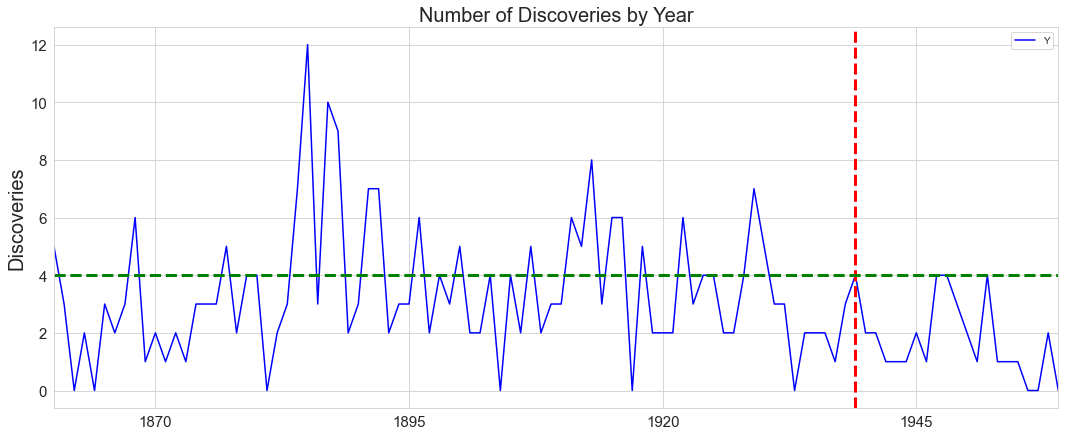

In [6]:
# Plot your the discoveries time series
ax = d.plot(color='blue', fontsize=6, figsize = (18, 7))

# Add a red vertical line
ax.axvline("1939-01-01", color="red", linestyle='--', linewidth = 3)

# Add a green horizontal line
ax.axhline(4, color="green", linestyle='--', linewidth = 3)

plt.title("Number of Discoveries by Year", size = 20)
plt.xlabel(None)
plt.ylabel("Discoveries", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

### Add shaded regions to your plot

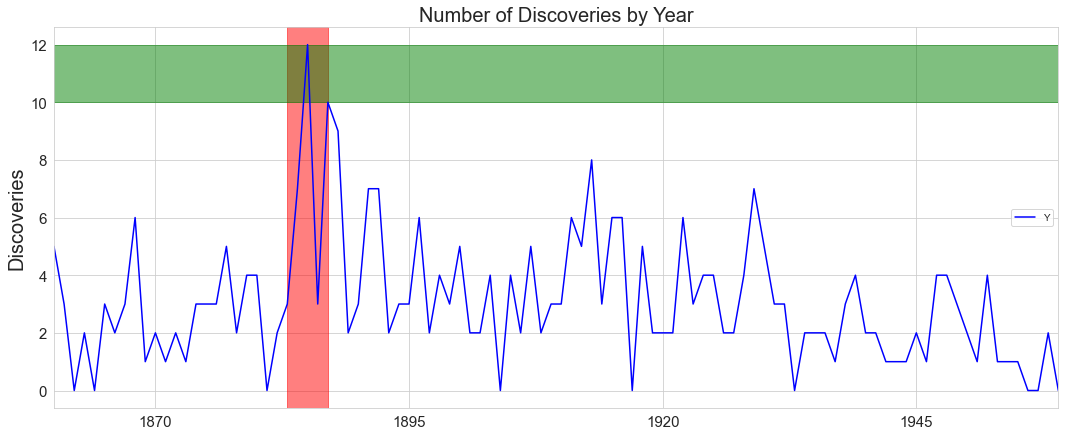

In [7]:
# Plot your the discoveries time series
ax = d.plot(color='blue', fontsize=6, figsize = (18, 7))

# Add a vertical red shaded region
ax.axvspan('1883-01-01', '1887-01-01', color="red", alpha=0.5)

# Add a horizontal green shaded region
ax.axhspan(12, 10, color="green", alpha=0.5)
plt.title("Number of Discoveries by Year", size = 20)
plt.xlabel(None)
plt.ylabel("Discoveries", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

### Display Rolling Averages

In [8]:
co2 = pd.read_csv("ch2_co2_levels.csv", index_col = "datestamp", parse_dates = ["datestamp"])
co2.head()

,co2
datestamp,
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


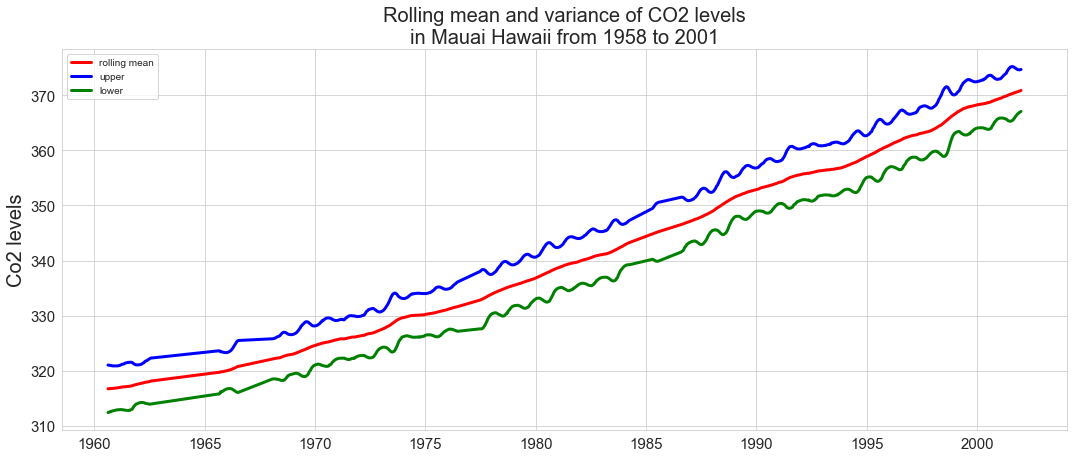

In [9]:
# Compute the 52 weeks rolling mean
co2_52m = co2.rolling(window = 52).mean()

# Compute the 52 weeks rolling standard deviation
co2_52s = co2.rolling(window = 52).std()

# Add the upper bound for co2
co2_52m["upper"] = co2_52m["co2"] + (2 * co2_52s["co2"])

# Add the lower bound for co2
co2_52m["lower"] = co2_52m["co2"] - (2 * co2_52s["co2"])

plt.figure(figsize = (18, 7))
sns.lineplot(x = co2_52m.index, y = "co2", data = co2_52m, color = "red", linewidth = 3, label = "rolling mean")
sns.lineplot(x = co2_52m.index, y = "upper", data = co2_52m, color = "blue", linewidth = 3, label = "upper")
sns.lineplot(x = co2_52m.index, y = "lower", data = co2_52m, color = "green", linewidth = 3, label = "lower")
plt.title("Rolling mean and variance of CO2 levels\nin Mauai Hawaii from 1958 to 2001", size = 20)
plt.xlabel(None)
plt.ylabel("Co2 levels", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()
plt.show()

### Display aggregated values

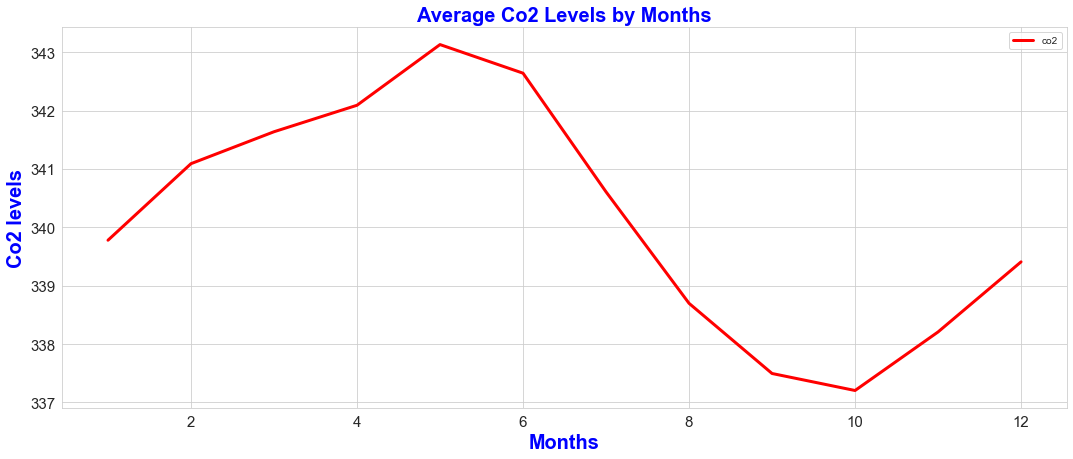

In [10]:
months = co2.index.month

co2_months = co2.groupby(months).agg("mean")

co2_months.plot(figsize = (18, 7), linewidth = 3, color = "red")
plt.title("Average Co2 Levels by Months", size = 20, color = "blue", weight = "bold")
plt.xlabel("Months", color = "blue", size = 20, weight = "bold")
plt.ylabel("Co2 levels", size = 20, color = "blue", weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

### Density Plot

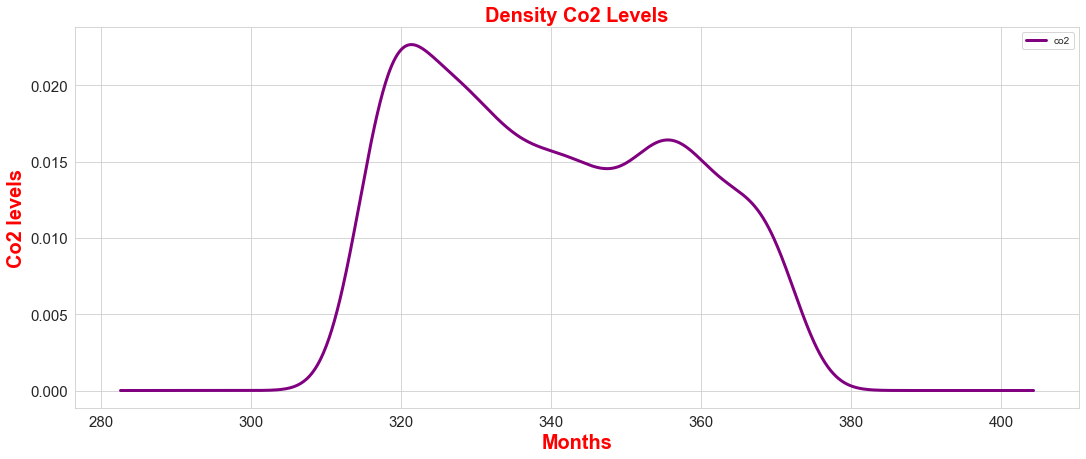

In [11]:
co2.plot(kind = "density", figsize = (18, 7), color = "purple", linewidth = 3)
plt.title("Density Co2 Levels", size = 20, color = "red", weight = "bold")
plt.xlabel("Months", color = "red", size = 20, weight = "bold")
plt.ylabel("Co2 levels", size = 20, color = "red", weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

In [12]:
co2 = co2.fillna(method="bfill")

### Time Series decomposition

**Seasonality**

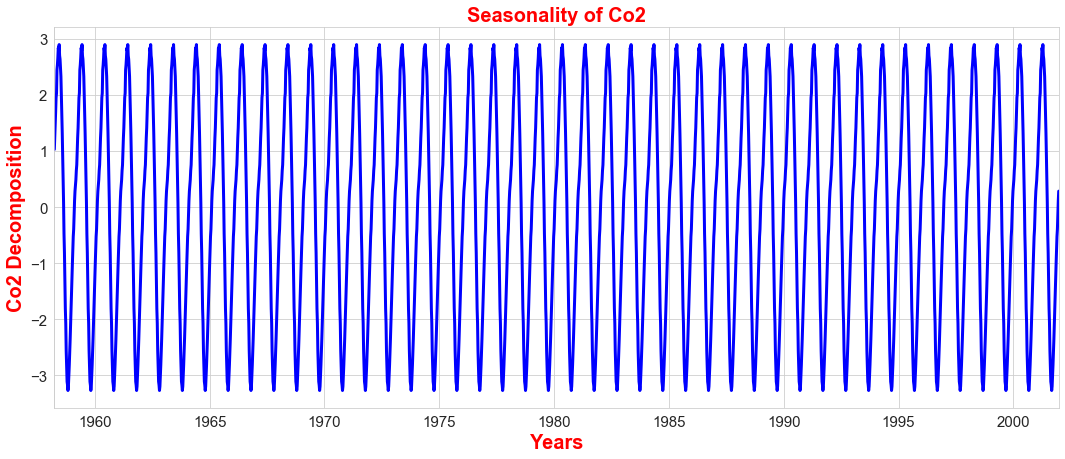

In [13]:
# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(co2["co2"])
decomposition.seasonal.plot(figsize = (18, 7), linewidth = 3, color = "blue")
plt.title("Seasonality of Co2", size = 20, color = "red", weight = "bold")
plt.xlabel("Years", color = "red", size = 20, weight = "bold")
plt.ylabel("Co2 Decomposition", size = 20, color = "red", weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

### Trends

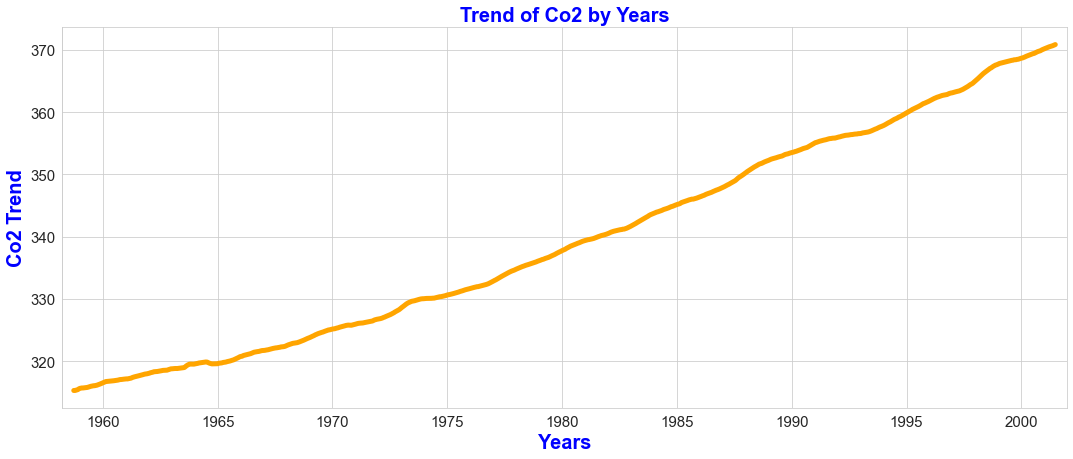

In [14]:
decomposition.trend.plot(figsize = (18, 7), color = "orange", linewidth = 5)
plt.title("Trend of Co2 by Years", size = 20, color = "blue", weight = "bold")
plt.xlabel("Years", color = "blue", size = 20, weight = "bold")
plt.ylabel("Co2 Trend", size = 20, color = "blue", weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

### Visualize the Airline Dataset

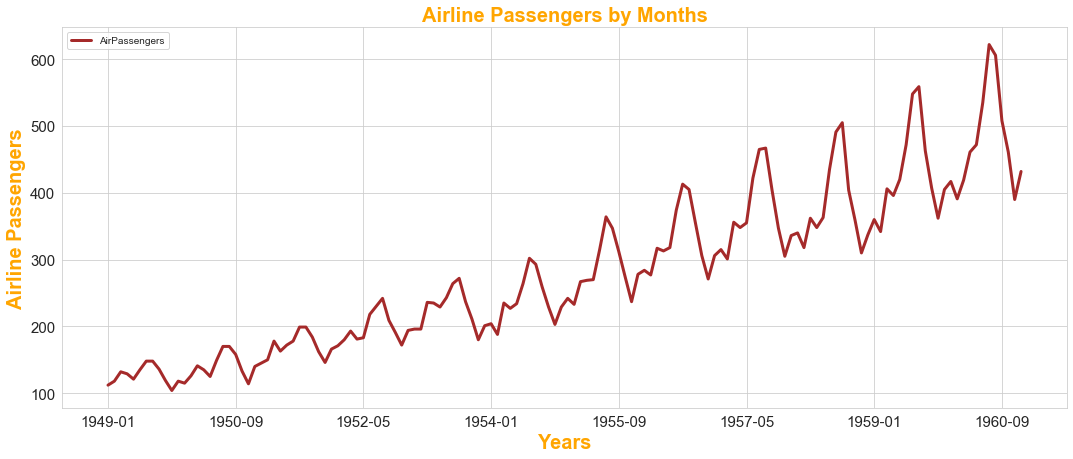

In [15]:
air = pd.read_csv("ch3_airline_passengers.csv", index_col = "Month")
air.index.name = "Date"
air.plot(figsize = (18, 7), color = "brown", linewidth = 3)
plt.title("Airline Passengers by Months", size = 20, color = "orange", weight = "bold")
plt.xlabel("Years", color = "orange", size = 20, weight = "bold")
plt.ylabel("Airline Passengers", size = 20, color = "orange", weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Airline Passengers by Month**

In [16]:
air["Month"] = air.index.str.split("-").str.get(1)

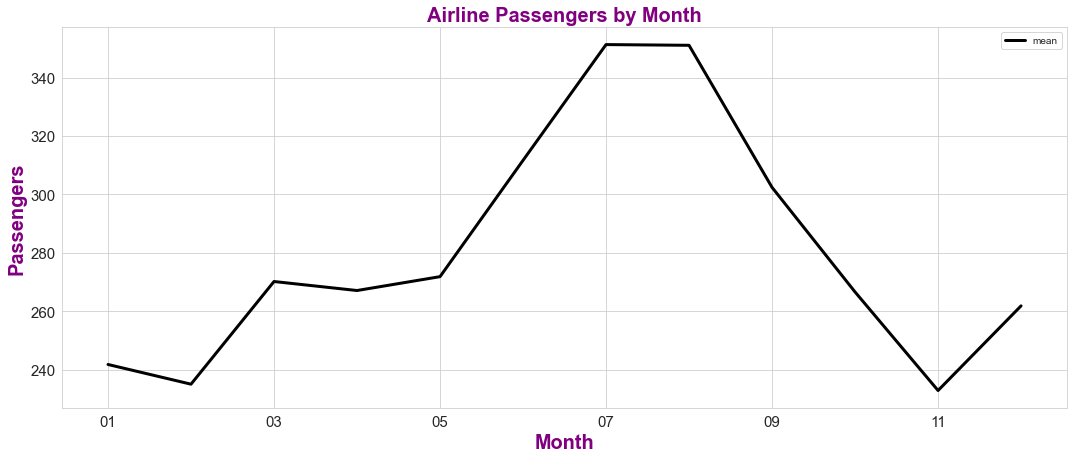

In [17]:
air_month = air.groupby("Month")["AirPassengers"].agg(["mean"])
air_month.plot(figsize = (18, 7), color = "black", linewidth = 3)
plt.title("Airline Passengers by Month", color = "purple", size = 20, weight = "bold")
plt.xlabel("Month", color = "purple", size = 20, weight = "bold")
plt.ylabel("Passengers", color = "purple", size = 20, weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Time Series Decomposition of the Airline**

In [18]:
air.index = pd.to_datetime(air.index)
air_decompose = sm.tsa.seasonal_decompose(air[["AirPassengers"]])

# Extract the trend and seasonal components
air_trend = air_decompose.trend
air_season = air_decompose.seasonal

**Airline Passenger Trends**

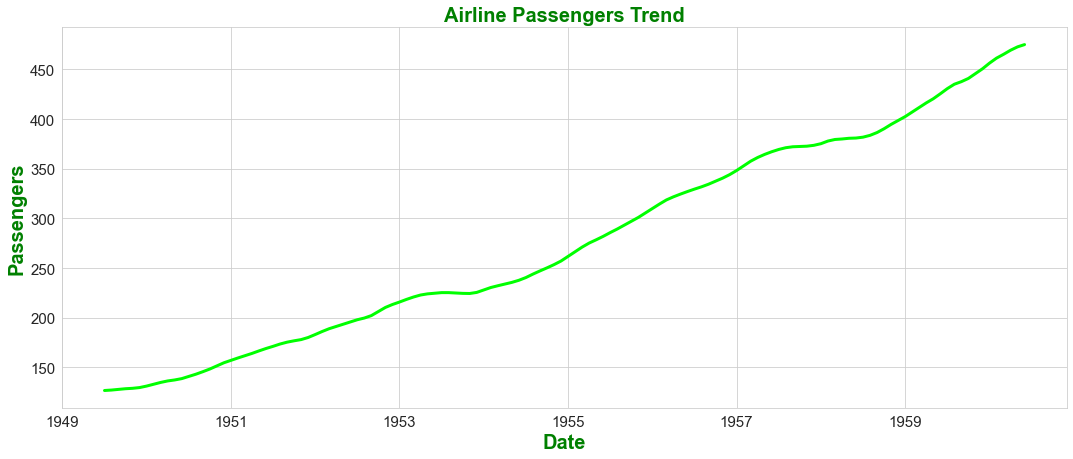

In [19]:
air_trend.plot(figsize = (18, 7), color = "lime", linewidth = 3)
plt.title("Airline Passengers Trend", color = "green", weight = "bold", size = 20)
plt.xlabel("Date", color = "green", size = 20, weight = "bold")
plt.ylabel("Passengers", color = "green", size = 20, weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Airline Passengers Seasonality**

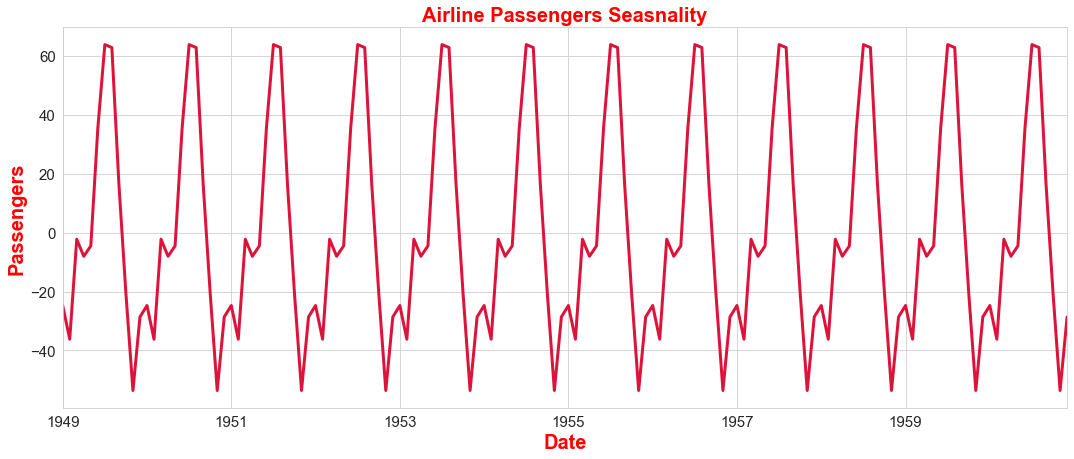

In [20]:
air_season.plot(figsize = (18, 7), color = "crimson", linewidth = 3)
plt.title("Airline Passengers Seasnality", color = "red", weight = "bold", size = 20)
plt.xlabel("Date", color = "red", size = 20, weight = "bold")
plt.ylabel("Passengers", color = "red", size = 20, weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

### Load multiple time series

In [23]:
meat = pd.read_csv("ch4_meat.csv", index_col = "date", parse_dates = ["date"])
meat = meat[meat.columns.drop("pork")]
meat.head()

,beef,veal,lamb_and_mutton,broilers,other_chicken,turkey
date,,,,,,
1944-01-01,751.0,85.0,89.0,NaN,NaN,NaN
1944-02-01,713.0,77.0,72.0,NaN,NaN,NaN
1944-03-01,741.0,90.0,75.0,NaN,NaN,NaN
1944-04-01,650.0,89.0,66.0,NaN,NaN,NaN
1944-05-01,681.0,106.0,78.0,NaN,NaN,NaN


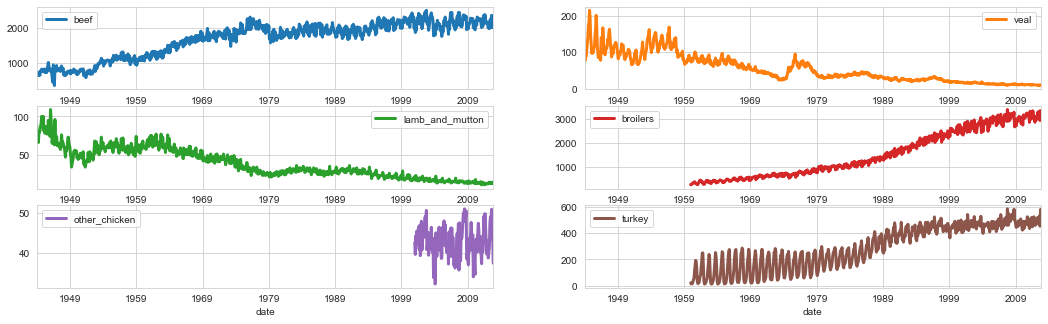

In [37]:
meat.plot(figsize = (18, 7), 
          linewidth = 3,
          layout = (4, 2),
          subplots = True,
          sharex = False,
          sharey = False)
plt.show()

### Compute correlations between time series

**Pearson Correlation**

In [41]:
b_lm_p = meat[["lamb_and_mutton", "beef", "veal"]].corr(method = "pearson")
b_lm_p

,lamb_and_mutton,beef,veal
lamb_and_mutton,1.000000,-0.830304,0.864955
beef,-0.830304,1.000000,-0.829704
veal,0.864955,-0.829704,1.000000


**Spearman Correlation**

In [43]:
b_lm_s = meat[["lamb_and_mutton", "beef", "veal"]].corr(method = "spearman")
b_lm_s

,lamb_and_mutton,beef,veal
lamb_and_mutton,1.000000,-0.836826,0.907334
beef,-0.836826,1.000000,-0.812437
veal,0.907334,-0.812437,1.000000


### Unemployment Analysis

In [46]:
emp = pd.read_csv("ch5_employment.csv", index_col = "datestamp", parse_dates = ["datestamp"])
emp.head()

,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
datestamp,,,,,,,,,,,,,,,,
2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
2000-05-01,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3


### Facet Plot

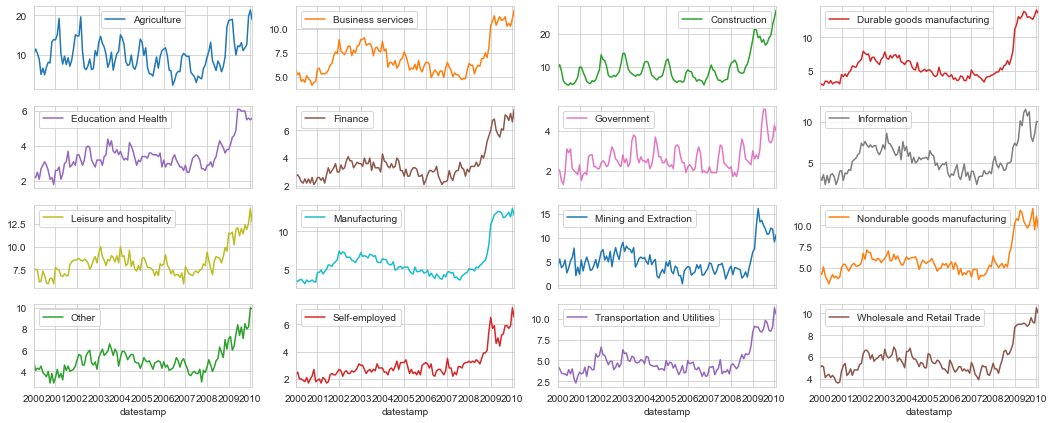

In [51]:
emp.plot(subplots = True,
          layout = (4, 4),
          figsize = (18, 7),
          sharex = True,
          sharey = False)
plt.show()

**Unemployment by Month**

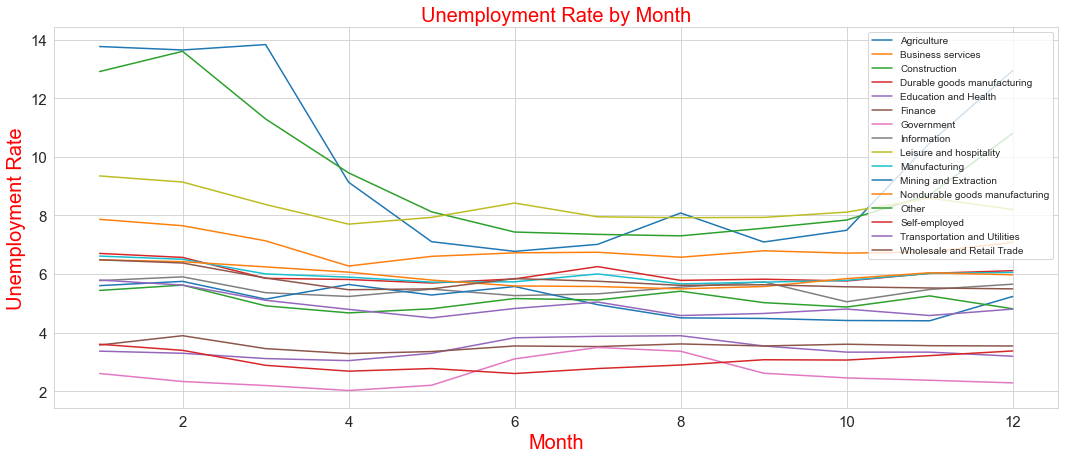

In [57]:
emp_month = emp.groupby(emp.index.month).mean()
emp_month.plot(figsize = (18, 7))
plt.title("Unemployment Rate by Month", size = 20, color = "red")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Month", size = 20, color = "red")
plt.ylabel("Unemployment Rate", size = 20, color = "red")
plt.show()

**Unemployment by Year**

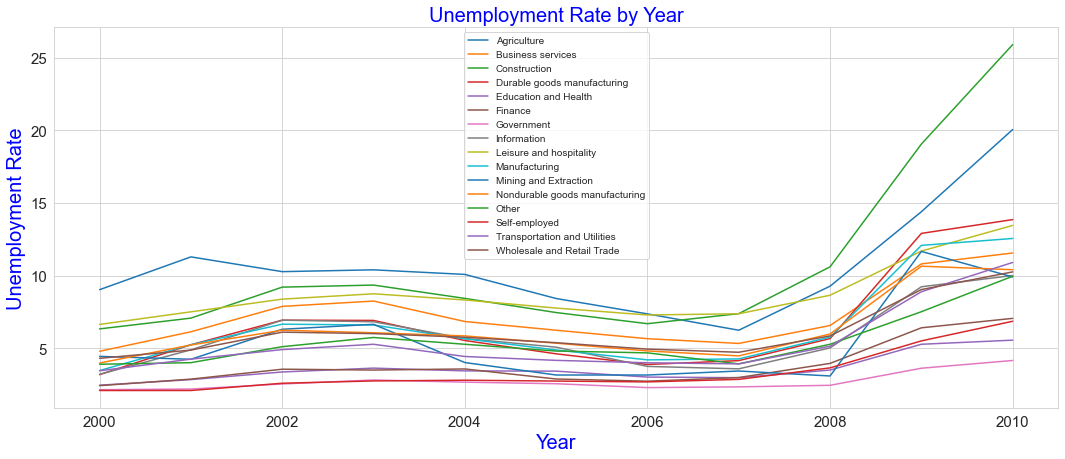

In [58]:
emp_year = emp.groupby(emp.index.year).mean()
emp_year.plot(figsize = (18, 7))
plt.title("Unemployment Rate by Year", size = 20, color = "blue")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Year", size = 20, color = "blue")
plt.ylabel("Unemployment Rate", size = 20, color = "blue")
plt.show()

### Time Series Decomposition on all dataset

In [69]:
# Initialize dictionary
jobs_decomp = {}

# Get the names of each time series in the DataFrame
jobs_names = emp.columns

# Run time series decomposition on each time series of the DataFrame
for ts in jobs_names:
    ts_decomposition = sm.tsa.seasonal_decompose(emp[ts])
    jobs_decomp[ts] = ts_decomposition

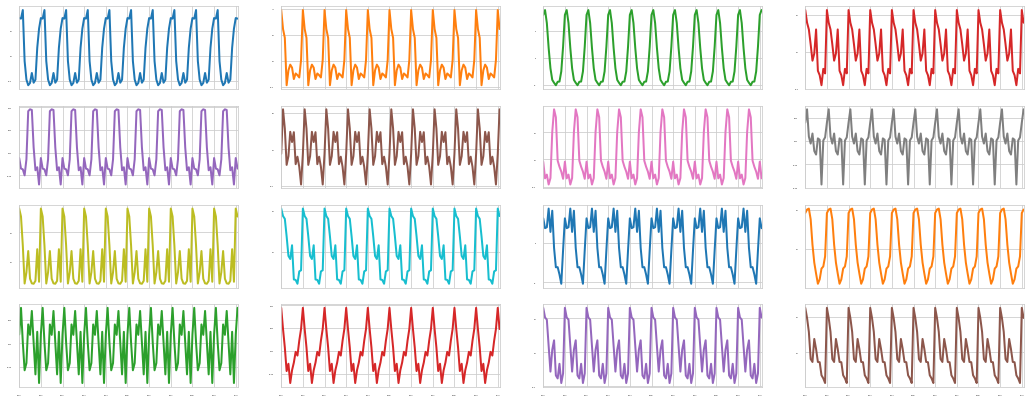

In [70]:
# Extract the seasonal values for the decomposition of each time series
for ts in jobs_names:
    jobs_decomp[ts] = jobs_decomp[ts].seasonal
    
# Create a DataFrame from the jobs_seasonal dictionary
seasonality_df = pd.DataFrame.from_dict(jobs_decomp)

# Remove the label for the index
seasonality_df.index.name = None

# Create a faceted plot of the seasonality_df DataFrame
seasonality_df.plot(subplots=True,
                    figsize = (18, 7),
                    layout=(4, 4),
                    sharey=False,
                    fontsize=2,
                    linewidth=2,
                    legend=False)

# Show plot
plt.show()